<a href="https://colab.research.google.com/github/Mervvick/AI_car_price_prediction/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%7C_%D0%94%D0%97_Ultra_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

По базе машин с ЮЛЫ данным обучите модель для предсказания цен на машины.

1. Создайте обучающую, тестовую и проверочную выборки.

2. Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен.)  

3. Подсчитайте ошибку на каждом примере тестовой выборки и суммарный процент ошибки.


Рекомендации:
- в качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse).
- метрику для данной задачи можно не использовать.
- последний слой модели должен иметь 1 нейрон.
- суммарный процент ошибки = средний модуль ошибки (MAE) / среднюю цену машины. Например, если средняя цена машины 560.000 р, а средняя ошибка 56.000р, то процент ошибки равен 10%.


In [ ]:
# Загрузка датафрейма из google облака
import gdown

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l10/cars_new.csv', None, quiet=True)

'cars_new.csv'

In [ ]:
# Ваше решение

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import  ReduceLROnPlateau,  EarlyStopping, ModelCheckpoint


# Проверка данных

In [ ]:
df = pd.read_csv('cars_new.csv')
df

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
...,...,...,...,...,...,...,...,...,...,...
70114,skoda,fabia 5j [рестайлинг],310000,2011,165000,хетчбэк,механика,бензин,1.2,70.0
70115,ford,focus 3 поколение,400000,2011,125000,хетчбэк,механика,бензин,1.6,105.0
70116,mazda,cx-5 1 поколение,1140000,2013,89981,кроссовер,автомат,бензин,2.0,150.0
70117,toyota,bb 2 поколение,550550,2006,183000,минивэн,автомат,бензин,1.3,92.0


Будем проверять данные по столбцам

In [ ]:
#Представленные марки
df.mark.unique()

array(['kia', 'daewoo', 'suzuki', 'bmw', 'chevrolet', 'hyundai', 'toyota',
       'mercedes-benz', 'chery', 'ford', 'mazda', 'peugeot', 'volkswagen',
       'audi', 'mitsubishi', 'opel', 'nissan', 'skoda', 'subaru', 'honda',
       'renault'], dtype=object)

Проверять модели вручную бессмысленно - слишком большой объем данных

In [ ]:
#Проверка цен
df.sort_values('price', ascending=False)[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
20187,mercedes-benz,s-класс maybach w222/c217/a217 [рестайлинг],24500000,2019,15,седан,автомат,бензин,5.0,469.0
25889,mercedes-benz,cl-класс amg c216 [рестайлинг],24000000,2010,58000,купе,робот,бензин,5.5,571.0
64995,mercedes-benz,s-класс maybach w222/c217/a217 [рестайлинг],22500000,2019,10,седан,автомат,бензин,4.0,469.0
49736,mercedes-benz,g-класс amg w464,18750000,2019,15,внедорожник,автомат,бензин,4.0,585.0
58006,mercedes-benz,g-класс amg w464,18544399,2019,12,внедорожник,автомат,бензин,4.0,585.0
25940,mercedes-benz,g-класс amg w464,17955700,2019,4500,внедорожник,автомат,бензин,4.0,585.0
10208,mercedes-benz,g-класс amg w463 [3-й рестайлинг],16800000,2018,580,внедорожник,автомат,бензин,5.5,571.0
44210,mercedes-benz,g-класс amg w464,16500000,2019,586,внедорожник,автомат,бензин,6.0,587.0
61018,mercedes-benz,v-класс 250 w447,16100000,2019,15,минивэн,автомат,дизель,2.2,190.0
64164,mercedes-benz,sls amg c197/r197,14990000,2010,30934,купе,робот,бензин,6.2,571.0


In [ ]:
df[df['price'].isna()]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power


По ценам ОК, нет предложений явно не соответствующих рынку

In [ ]:
#Проверка возраста
df.sort_values('year')[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
38836,bmw,321,590000,1949,100000,седан,механика,дизель,1.0,100.0
2037,ford,anglia,500000,1950,600000,купе,механика,бензин,1.0,32.0
49788,opel,super 6,150000,1950,100000,купе,механика,бензин,1.0,90.0
6902,opel,super 6 1 поколение,350000,1950,500000,седан,механика,бензин,2.0,40.0
14265,peugeot,203,667000,1951,215000,седан,механика,бензин,1.3,49.0
47582,mercedes-benz,c-класс,2500000,1959,55776,седан,механика,бензин,2.0,90.0
60381,ford,fairlane,800000,1968,307000,фастбэк,механика,бензин,7.2,250.0
27351,renault,16 1 поколение,140000,1968,260000,хетчбэк,механика,бензин,1.6,83.0
49107,nissan,terrano,400000,1968,320000,внедорожник,автомат,дизель,3.2,170.0
39027,mercedes-benz,s-класс,650000,1968,74000,седан,механика,бензин,2.8,160.0


In [ ]:
df.sort_values('year', ascending=False)[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
35574,renault,logan 2 поколение [рестайлинг],463000,2019,16300,седан,механика,бензин,1.6,82.0
24430,bmw,x6 40 f16,6420000,2019,11,кроссовер,автомат,дизель,3.0,313.0
8675,skoda,superb 3 поколение,2560000,2019,218,лифтбэк,робот,бензин,2.0,220.0
57934,hyundai,solaris 2 поколение,890000,2019,1700,седан,автомат,бензин,1.6,123.0
33282,renault,logan 2 поколение,699000,2019,7010,седан,механика,бензин,1.6,82.0
24271,mercedes-benz,c-класс 200 w205/s205/c205 [рестайлинг],2647803,2019,3025,седан,автомат,бензин,1.5,184.0
69227,bmw,x3 20 g01,3120000,2019,3,кроссовер,автомат,дизель,2.0,190.0
52332,mercedes-benz,glc-класс 250 x253/c253,2999000,2019,5200,кроссовер,автомат,дизель,2.1,204.0
4093,ford,ecosport 2 поколение [рестайлинг],1200000,2019,500,кроссовер,автомат,бензин,1.5,123.0
24318,bmw,5 серия 530 g30,4490000,2019,300,седан,автомат,дизель,3.0,249.0


Данные по возрасту корректны

In [ ]:
df.sort_values(['mileage', 'year'], ascending=[False, False])

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
37836,toyota,ist 1 поколение,295000,2002,999999,хетчбэк,автомат,бензин,1.3,87.0
49720,nissan,ad y11,60000,2001,999999,универсал,автомат,бензин,1.3,87.0
20641,toyota,caldina 2 поколение [рестайлинг],300000,2000,999999,универсал,автомат,бензин,2.0,135.0
13358,nissan,avenir w11,200000,1999,999999,универсал,вариатор,бензин,2.0,150.0
3791,daewoo,nexia 1 поколение,70000,1998,999999,седан,механика,бензин,1.5,75.0
...,...,...,...,...,...,...,...,...,...,...
63251,renault,sandero stepway 2 поколение [рестайлинг],1200000,2019,1,хетчбэк,механика,бензин,1.6,82.0
46404,ford,kuga 2 поколение [рестайлинг],1638000,2018,1,кроссовер,автомат,бензин,1.5,150.0
56218,ford,fiesta 6 поколение [рестайлинг],777000,2018,1,хетчбэк,робот,бензин,1.6,105.0
6468,toyota,sprinter e110,40000,1998,1,седан,автомат,бензин,1.5,100.0


Пробег - ОК. Нет новых машин с большим пробегом

In [ ]:
df.body.unique()

array(['седан', 'внедорожник', 'кроссовер', 'хетчбэк', 'универсал',
       'минивэн', 'лифтбэк', 'купе', 'микроавтобус', 'пикап', 'кабриолет',
       'хардтоп', 'родстер', 'тарга', nan, 'лимузин', 'фастбэк'],
      dtype=object)

С типом кузова есть проблемы - у некоторых машин он не указан (nan)

In [ ]:
df[df['body'].isna()]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
12236,volkswagen,golf,325000,2005,140000,NaN,автомат,бензин,1.6,102.0
60368,mitsubishi,lancer,268000,2005,121000,NaN,механика,бензин,1.6,98.0
68439,audi,a5 8t [рестайлинг],949900,2013,119000,NaN,автомат,бензин,2.0,211.0


Все три машины имеют версии в разных кузовах, поэтому не можем точно сказать, какой имеется в виду, следовательно -> удаляем

In [ ]:
df.drop(df[df['body'].isna()].index, inplace=True)

In [ ]:
df[df['body'].isna()]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power


Идем дальше

In [ ]:
#Проверка по КПП
df.kpp.unique()

array(['автомат', 'механика', 'робот', 'вариатор', nan], dtype=object)

In [ ]:
df[df['kpp'].isna()]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
768,skoda,yeti 1 поколение,675000,2012,96472,кроссовер,NaN,бензин,1.2,105.0
33857,ford,focus 3 поколение,529000,2012,59000,универсал,NaN,бензин,1.6,105.0
46153,volkswagen,passat b6,499000,2006,156000,седан,NaN,бензин,2.0,140.0
55033,ford,fiesta 6 поколение [рестайлинг],589000,2016,57000,седан,NaN,бензин,1.6,105.0


Есть модели без данных о коробке, поскольку всего 4 модели - можем их удалить, т.к. не сильно повлияет на объем выборки

In [ ]:
df.drop(df[df['kpp'].isna()].index, inplace=True)

In [ ]:
df[df['kpp'].isna()]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power


Идем дальше

In [ ]:
#Проверка по типу топлива
df.fuel.unique()

array(['бензин', 'дизель', 'гибрид', 'электро', 'газ'], dtype=object)

С топливом все ОК

In [ ]:
#Проверка объема двигателя
df.sort_values('volume', ascending=False)[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
11810,chevrolet,lanos 1 поколение,80000,2008,90000,седан,механика,бензин,10.0,63.0
15149,mercedes-benz,vito w638,450000,2002,250000,минивэн,автомат,дизель,10.0,150.0
53455,volkswagen,multivan t5 [рестайлинг],1750000,2012,152000,минивэн,робот,дизель,10.0,260.0
58092,toyota,rav4,450000,2003,177000,кроссовер,автомат,бензин,9.0,51.0
57429,chevrolet,suburban gmt800,750000,2005,329000,внедорожник,автомат,бензин,8.1,320.0
16785,chevrolet,lanos 1 поколение,45000,2006,223034,седан,механика,бензин,8.0,86.0
45084,daewoo,matiz,120000,2005,150000,хетчбэк,механика,бензин,8.0,51.0
66747,toyota,corona t210,230000,1999,170000,седан,автомат,дизель,8.0,95.0
25800,bmw,6 серия 650 e63/e64,790000,2006,130000,купе,автомат,бензин,8.0,407.0
60381,ford,fairlane,800000,1968,307000,фастбэк,механика,бензин,7.2,250.0


У некоторых моделей явно ошибка.
По модели и мощности точное соответствие удалось найти для Мерседеса - 2.0 литра, Шевроле на 63 л.с. - 1.3 литра, Шевроле на 86 л.с. - 1.5 литра, Матиз - 0.8 литра.
Тойоты и Вольксваген удаляем.

In [ ]:
df.loc[df.index==11810, 'volume'] = 1.3
df.loc[df.index==15149, 'volume'] = 2.0
df.loc[df.index==16785, 'volume'] = 1.5
df.loc[df.index==45084, 'volume'] = 0.8
df.drop(df[df['volume'] == 9.0].index, inplace=True)
df.drop(66747, inplace=True)
df.drop(53455, inplace=True)

In [ ]:
df[df.index==11810]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
11810,chevrolet,lanos 1 поколение,80000,2008,90000,седан,механика,бензин,1.3,63.0


In [ ]:
#Проверка лошадиных сил
df.sort_values('power', ascending=False)[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
27771,mitsubishi,asx 1 поколение [рестайлинг],746000,2013,97000,кроссовер,вариатор,бензин,1.8,1400.0
5603,opel,astra,469000,2011,122000,хетчбэк,автомат,бензин,1.4,1400.0
63264,toyota,camry xv30,400999,2003,340000,седан,механика,бензин,2.4,1152.0
46287,volkswagen,touareg 1 поколение,250000,2004,230000,кроссовер,автомат,бензин,3.2,999.0
62315,renault,logan 1 поколение [рестайлинг],302000,2011,83000,седан,механика,бензин,1.4,750.0
36764,toyota,crown s130 [рестайлинг],120000,1993,707,седан,автомат,бензин,2.0,707.0
21121,mercedes-benz,amg gt s c190 [рестайлинг],11700000,2018,2300,лифтбэк,робот,бензин,4.0,639.0
5829,mercedes-benz,s-класс w220 [рестайлинг],375000,2004,120000,седан,автомат,бензин,5.5,630.0
16256,mercedes-benz,s-класс w222/c217/a217 [рестайлинг],8999000,2017,28533,купе,автомат,бензин,4.0,612.0
2827,mercedes-benz,s-класс amg w222/c217/a217 [рестайлинг],14500000,2019,50,седан,автомат,бензин,4.0,612.0


Меняем неправильные значения

In [ ]:
df.loc[df.index==27771, 'power'] = 140
df.loc[df.index==5603, 'power']  = 140
df.loc[df.index==63264, 'power'] = 152
df.loc[df.index==46287, 'power'] = 241
df.loc[df.index==62315, 'power'] = 75
df.loc[df.index==36764, 'power'] = 135

In [ ]:
df.sort_values('power', ascending=False)[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
21121,mercedes-benz,amg gt s c190 [рестайлинг],11700000,2018,2300,лифтбэк,робот,бензин,4.0,639.0
5829,mercedes-benz,s-класс w220 [рестайлинг],375000,2004,120000,седан,автомат,бензин,5.5,630.0
16256,mercedes-benz,s-класс w222/c217/a217 [рестайлинг],8999000,2017,28533,купе,автомат,бензин,4.0,612.0
44963,mercedes-benz,g-класс amg w463 [2-й рестайлинг],5190000,2014,58262,внедорожник,автомат,бензин,6.0,612.0
67566,mercedes-benz,g-класс amg w463 [2-й рестайлинг],7333000,2012,18821,внедорожник,автомат,бензин,6.0,612.0
2827,mercedes-benz,s-класс amg w222/c217/a217 [рестайлинг],14500000,2019,50,седан,автомат,бензин,4.0,612.0
68050,audi,rs 6 c7 [рестайлинг],6767000,2017,9879,универсал,автомат,бензин,4.0,605.0
56128,bmw,m5 f90,6900000,2018,4999,седан,автомат,бензин,4.4,600.0
7278,bmw,m5 f90,6477000,2018,16738,седан,автомат,бензин,4.4,600.0
44023,bmw,m5 f90,6990000,2018,12260,седан,автомат,бензин,4.4,600.0


Теперь все OK

In [ ]:
df.reset_index(drop=True, inplace = True)

# Подготовка данных для обучения

In [ ]:
def columnsToOHE(column):
    uni, inver = np.unique(df[column], return_inverse=True)
    return utils.to_categorical(inver, num_classes = len(uni))

In [ ]:
text_columns = ['mark', 'model', 'body', 'kpp', 'fuel']

In [ ]:
OHE_data = []
for column in range(len(text_columns)):
    OHE_data.append(columnsToOHE(text_columns[column]))

In [ ]:
OHE_train = np.concatenate([i for i in OHE_data], axis = 1)

In [ ]:

print(np.sum([i.shape[1] for i in OHE_data]))
print(OHE_train.shape)

3202
(70109, 3202)


In [ ]:
price = np.array(df['price'], dtype=float)

year = preprocessing.scale(df['year'])
mileage = preprocessing.scale(df['mileage'])
volume = preprocessing.scale(df['volume'])
power = preprocessing.scale(df['power'])

In [ ]:
numeric_columns = [year, mileage,	volume,	power]

In [ ]:
def get_row(row):
    y_data = price[row]
    x_data = np.hstack([OHE_train[row],
                         [i[row] for i in numeric_columns]])
    return x_data, y_data

In [ ]:
x_data = []
y_data = []

for row in range(df.shape[0]):
    row_data = get_row(row)
    x_data.append(row_data[0])
    y_data.append(row_data[1])
x_train = np.array(x_data)
y_train = np.array(y_data)

In [ ]:
print(x_train.shape, y_train.shape)

(70109, 3206) (70109,)


# Нормирование цены

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.1)

In [ ]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [ ]:
y_train_scaled.shape

(63098,)

# Модель

In [ ]:
reduceLROnPlateau = ReduceLROnPlateau(monitor  = 'val_loss',
                                      factor   = 0.6,
                                      patience = 2,
                                      verbose  = 1)


earlystop = EarlyStopping(monitor              ='val_loss',
                          min_delta            = 0,
                          patience             = 5,
                          verbose              = 1,
                          baseline             = None,
                          restore_best_weights = True)

In [ ]:
model = Sequential()

model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss=['mse'], metrics='mae')

In [ ]:
history = model.fit(x_train,
                    y_train_scaled,
                    batch_size=32,
                    epochs=50,
                    validation_split=0.15,
                    verbose=1,
                    callbacks=[reduceLROnPlateau, earlystop])

Epoch 1/50
1677/1677 [==============================] - 15s 5ms/step - loss: 0.1924 - mae: 0.1704 - val_loss: 0.1418 - val_mae: 0.1629 - lr: 1.0000e-04
Epoch 2/50
1677/1677 [==============================] - 7s 4ms/step - loss: 0.1116 - mae: 0.1332 - val_loss: 0.1160 - val_mae: 0.1474 - lr: 1.0000e-04
Epoch 3/50
1677/1677 [==============================] - 8s 5ms/step - loss: 0.0897 - mae: 0.1272 - val_loss: 0.0879 - val_mae: 0.1421 - lr: 1.0000e-04
Epoch 4/50
1677/1677 [==============================] - 7s 4ms/step - loss: 0.0714 - mae: 0.1180 - val_loss: 0.0822 - val_mae: 0.1288 - lr: 1.0000e-04
Epoch 5/50
1677/1677 [==============================] - 8s 5ms/step - loss: 0.0655 - mae: 0.1166 - val_loss: 0.0677 - val_mae: 0.1238 - lr: 1.0000e-04
Epoch 6/50
1677/1677 [==============================] - 8s 5ms/step - loss: 0.0677 - mae: 0.1145 - val_loss: 0.0884 - val_mae: 0.1247 - lr: 1.0000e-04
Epoch 7/50
1669/1677 [============================>.] - ETA: 0s - loss: 0.0595 - mae: 0.1096


In [ ]:
model.save('/content/drive/My Drive/AI/models/model_cars.h5')

In [ ]:
from sklearn.metrics import mean_absolute_error

220/220 [==============================] - 1s 3ms/step
Средняя абсолютная ошибка: 80281 



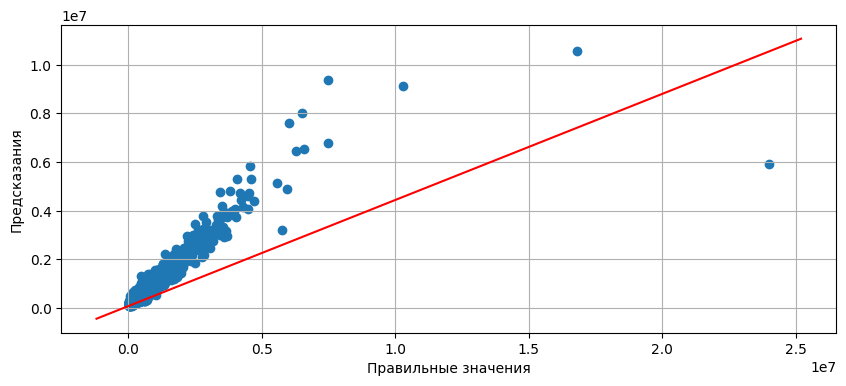

In [ ]:
pred = model.predict(x_test)
pred = y_scaler.inverse_transform(pred)

mae = round(mean_absolute_error(pred, y_test))
print('Средняя абсолютная ошибка:', mae, '\n')

fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(y_test, pred)
ax.plot(plt.xlim(), plt.ylim(), 'r')
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.grid()
plt.show()

In [ ]:
mean_price = round(np.mean(y_test))

print(f'mae: {mae}')
print(f'Средняя цена машины: {mean_price}')
print(f'Суммарный процент ошибки: {round(100 * mae/mean_price)}%')

mae: 80281
Средняя цена машины: 520218
Суммарный процент ошибки: 15%
